# Wprowadzenie do Pandas i Seaborn

## Pandas

Pakiet Pandas udostępnia dwa obiekty służące do wygodnego przechowywania danych i ułatwiających manipulowanie danymi:
* **Series** to obiekt reprezentujący jednowymiarową tablicę danych
* **DataFrame** to dwu-wymiarowa tabela danych (zbiór obiektów series)

Pandas WWW: <https://pandas.pydata.org/>  
Pandas Tutorial: <https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html>

## Series

Seria jest obiektem reprezentującym jednowymiarową tablicę danych, której elementy są indeksowane. Seria może być utworzona z dowolnej kolekcji liczb: krotki, listy, tablicy numpy a nawet ze słownika. Obiekt Series udostępnia wiele metod pozwalających operować na danych w serii, zawiera też  metody do wizualizowania danych. Dodatkowo, wiele funkcji z pakietu numpy może byc użytych na tym obiekcie, jeżeli tylko seria zawiera liczby.

In [ ]:
import pandas as pd

s = pd.Series([3.1, 2.4, -1.7, 0.2, -2.9, 4.5])   # seria utworzona z listy liczb

print(s)
print('Values=', s.values)     # wartości serii
print('Index=', s.index)       # indeksy  serii 
print('Pierwszy element:', s[0])  

W odróżnieniu do tablic indeksami nie muszą być liczby całkowite. 

In [ ]:
import numpy as np

s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

In [ ]:
print('Values=', s.values)   # wartości, to tablica numpy
print('Index=', s.index)     # indeksy

In [ ]:
print(s['a'])     # indeksowanie za pomocą napisów
print(s[0])       # indeksowanie liczbami całkowitymi nadal działa

Obiekt Series w wielu sytuacjach zachowuje się podobnie do tablic NumPy.  
W podobny sposób indeksuje się elementy serii, z tą różnicą, że przekroje również dotyczą indeksów.

In [ ]:
s = pd.Series([1.2, 2.5, -2.2, 3.1, -0.8], 
            index = ['pn','wt','śr','czw','pt'])
s

In [ ]:
s[1:3]          # przekrój serii (elementy od 1 do 2)

In [ ]:
s['wt':'czw']    # elementy od wt do czw (zauważ, że ostatni element 'czw' też jest włączony)

Filtrowanie za pomocą reguł logicznych

In [ ]:
s[s > 0]

In [ ]:
s[(s > 0) & (s < 3) | (s.index == 'pt')]

Gdy seria zawiera wartości numeryczne to można wykonywać na niej operacje arytmetyczne i funkcje NumPy

In [ ]:
s + 4

In [ ]:
np.exp(s + 1)

## Series: statystyki opisowe
Obiekt serii posiada wiele metod operujących na jednowymiarowej serii danych, np. funkcje statystyczne (np. min, median) ale także metody wizualizujące dane (np. hist, plot).   

Lista metod klasy Series: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html>

In [ ]:
s = pd.Series(np.random.randn(1000))

print(s.head())    
print('Sredna', s.mean())
print('Mediana', s.median())

Funkcja ``describe()`` - podstawowe statystyki opisowe

In [ ]:
s = pd.Series(5.0 * np.random.randn(1000) + 2.0 )
s.describe()

In [ ]:
# dla zmiennej dyskretnej
s2 = pd.Series(['Orzeł', 'Reszka', 'Orzeł','Orzeł', 'Reszka' ])
s2.describe()

Funkcje wykresów korzystają z matplotlib

In [ ]:
s = pd.Series(5.0 * np.random.randn(1000) + 2.0 )

s[:10].plot()

In [ ]:
s.plot(kind='hist')

## DataFrame

Obiekt `DataFrame` reprezentuje 2-wymiarową tabelę danych, która posiada indeksowane kolumny oraz wiersze.  
Każda kolumna to obiekt Series. Kolumna reprezentuje zmienną i może zawierać elementy różnego typu (liczby, wartości kategoryczne, napisy, serie czasowe, itd.). 

<div>
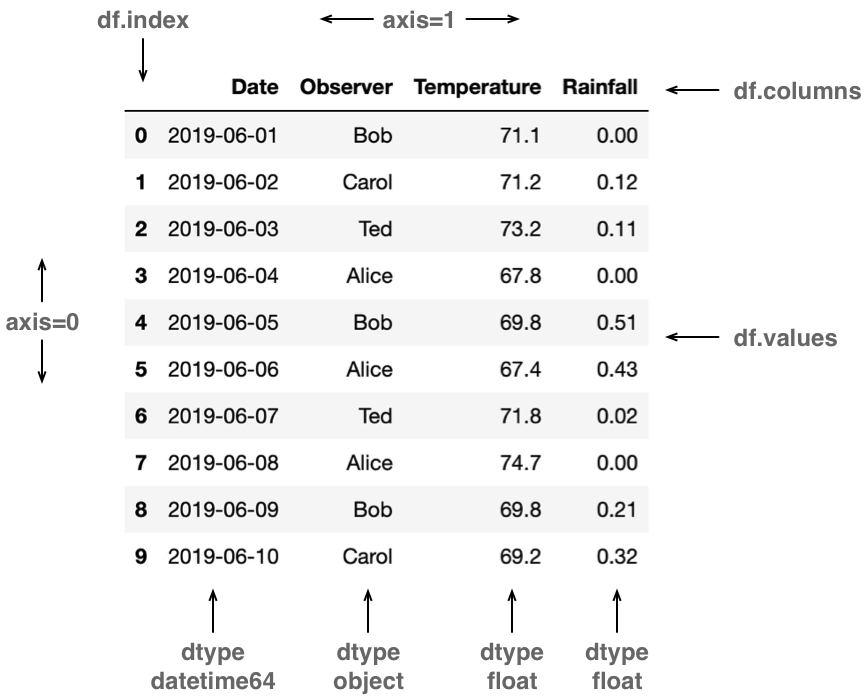
</div>



Tworzenie tablic DataFrame (np. z tablicy numpy)

In [ ]:

df = pd.DataFrame(np.random.rand(4,3), columns=['zmienna 1', 'zmienna 2', 'zmienna 3'])
display(df)

Kolumny (zmienne) indeksowane za pomocą nazw zmiennych.

In [ ]:
df['zmienna 2']   # wynikiem jest seria

Kolumna tabeli jest obiektem Series

In [ ]:
type(df['zmienna 2'])

In [ ]:
df['zmienna 2'].plot();

Dodawanie nowych kolumn w tabeli przypomina dodawanie nowych elementów do słownika.

In [ ]:
df['rok'] = 2021                              # dodanie kolumny ze stałą wartością
df['x1'] = np.random.rand(4 )   
df['liczby'] = ['raz', 'dwa', 'trzy', 'cztery']
df['zm1+zm2'] = df['zmienna 1'] + df['zmienna 2']
df                  

Wypór kilku zmiennych

In [ ]:
df[ ['rok','zmienna 1'] ]    

Wynik jest typu DataFrame  - otrzymujemy nowy widok tabeli

In [ ]:
type(df[['zmienna 1','rok']]) 

Kolumna dostępna jest też w poprzez atrybut obiektu DataFrame o tej samej nazwie

In [ ]:
df.rok           # to samo co df['rok']

## Indeksowanie tablic DataFrame

* atrybut `iloc[]` umożliwia indeksowanie za pomocą liczb całkowitych (lub macierzy boolowskich), podobnie jak w NumPy
* atrybut `loc[]` umożliwia indeksowanie za pomocą etykiet oraz macierzy boolowskich

In [ ]:
display(df)

df.iloc[2]    # wiersz 3, wynikiem jest seria elementów wiersza, elementy moga być różnego typu

In [ ]:
df.iloc[2 ,1]    # 3 wiersz, 2 kolumna

Indeksowanie zakresów dwukropkiem : podobnie jak w NumPy

In [ ]:
display(df)
df.iloc[:, 2]   # trzecia kolumna tabeli -> wynikiem jest seria

In [ ]:
df.iloc[:2, 1:3]     # przekrój danych (wiersze 0,1,2 i kolumny 1,2) -> wynik DataFrame

In [ ]:
df.loc[2]    # tu indeksy są liczbami, więc działa tak samo jak iloc[]

In [ ]:
df.loc[:2]    # zauważ, że loc[] uwzględnia ostatni element indeksowania

In [ ]:
df.loc[:2, 'rok':'x1']

In [ ]:
df.loc[:2, ['rok', 'x1']]

Filtrowanie za pomocą wyrażeń logicznych

In [ ]:
df[ df['x1'] < 0.6 ]

In [ ]:
df[ (df.x1 < 0.6) | (df.liczby == "trzy") ]

###  Operacje arytmetyczne i funkcje NumPy

Jeżeli tablica zawiera dane liczbowe to można na nich wykonywać operacje arytmetyczne a nawet metody numpy.

In [ ]:
data = pd.DataFrame(np.random.rand(5, 3), columns=['x1', 'x2', 'x3'])
print(data)

print('Transpozycja:') 
print(data.T)    # transpozycja 

In [ ]:
print('Dodawanie:')
print(data + 4)    # dodawanie liczby do wszystkich elementów

In [ ]:
print('Mnożenie:')
print(data * 10)   # mnożenie

In [ ]:
print('np.exp():')
print(np.exp(data))   # exp() dla wszystkich elementów

## Import danych z plików CSV

In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tips

Tablica DataFrame posiada wiele przydatnych metod ułatwiających operowanie danymi, wyznaczanie statystyk i sporządzenie wykresów.

Zobacz: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html>

Informacje o nazwie i typie zmiennych (kolumn)

In [ ]:
tips.info()     # informacje o zmiennych

In [ ]:
tips.head()     # podgląd początku tabeli

Podstawowe statystyki dotyczące zmiennych (kolumn)

In [ ]:
tips.describe()   # domyślnie wynik tylko dla zmiennych liczbowych (ciągłych)

In [ ]:
import numpy as np
tips.describe(include=object)    # statystyki zm. nominalnych (typ object)

In [ ]:
print('Max:')
tips.max()           # maksimum wzgl. kolumn 

In [ ]:
print('Średnie wartości w grupie mężczyzn:')
tips[tips.sex == 'Male'][['tip', 'total_bill']].mean()

## Wykresy , metoda plot()

Rodzaje wykresów, argument `kind=`   
  `'line'` (default), `'bar'`, `'hist'`, `'box'`, `'kde'`, `'area'`, `'pie'`, `'scatter'`
  
Wykresy są robione tylko dla zmiennych numerycznych

In [ ]:
# wykres liniowy, domyślnie os x to indeksy Dataframe
tips.plot()
tips.head()

Wykres rozrzutu (punktowy)

In [ ]:
tips.plot(kind='scatter', x='total_bill', y='tip', title='Wykres rozrzutu');

Histogram

In [ ]:
tips[ tips.sex == 'Male'].plot(kind = 'hist', y = 'total_bill', title='Histogram');
tips[ tips.sex == 'Female'].plot(kind = 'hist', y = 'total_bill');

Wykres skrzynkowy

In [ ]:
tips.plot(kind='box');

In [ ]:
tips['total_bill'].plot(kind='box');

## Grupowanie danych

Operacja grupowania `groupby()` pozwala w wygodny sposób wykonać operacje na grupach danych (np. wyznaczyć wartość średnią w grupach).

In [ ]:
tips_mean = tips.groupby(['sex']).mean()    # średnie wartości napiwków (tips) względem płci 
tips_mean  # wynik jest typu DataFrame

In [ ]:
tips_mean['tip'].plot(kind='bar');

In [ ]:
tips.groupby(['smoker', 'sex']).count()    # grupowanie po dwóch zmiennych 

In [ ]:
tips.groupby(['smoker', 'sex']).mean() 

In [ ]:
tips.groupby(['smoker', 'sex']).mean().plot(kind='bar');

## Pakiet Seaborn

Seaborn to biblioteka do wizualizacji danych bazująca na matplotlib, która udostępnia zestaw narzędzi do tworzenia typowych wykresów używanych w statystyce i analizie danych. Źródłem danych dla wykresów Seaborn mogą być serie i tabele Pandas.

WWW: <https://seaborn.pydata.org/>  
Tutorial: <https://seaborn.pydata.org/tutorial.html>  
Rodzaje dostepnych wykresów, API <https://seaborn.pydata.org/api.html>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")     # ustawienie stylu

In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tips.head()

### Wykres rozkładu danych

histogram, estymacja gęstości `displot(), histplot()`

In [ ]:
# histogram z dopasowanymym wykresem rozkładu gęstości dla pojedynczej zmiennej
sns.displot(data=tips, x='total_bill', kde=True);

Wtkres skrzynkowy `boxplot`

In [ ]:
sns.boxplot(data=tips, y='tip');

In [ ]:
# wykres skrzynkowy w grupach utworzonych przez zmienną 'sex'
sns.boxplot(data=tips, y='tip', x='sex');

### Wykresy relacji dwóch zmiennych

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip");  # wykres rozrzutu

Wykres rozrzutu z podziałem na grupy

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue='sex');  # grupy w różnych kolorach

Funkcja `relplot()` - ogólna funkcja do wizualizacji zależności pozwala również podzielić wykresy w kolumnach

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips, col='sex', kind='scatter'); 


pairplot() - wykres relacji wszystkich par zmiennych numerycznych

In [ ]:
sns.pairplot(tips);

regplt() - wykres z regresja liniową

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips); 

### Wykresy zmiennych dyskretnych: 

In [ ]:
# wykres słópkowy liczby próbek w grupach 
sns.countplot(data=tips, x="sex");

In [ ]:
# to samo w podziale na grupy 'time' 
# catplot() ogólna funkcja dla zmiennych kategorycznych, pozwala rozdzielić wykresy w kolumnach
sns.catplot(data=tips, kind="count", x="sex", col="time");

## Zadanie

Korzystając z pakietu Pandas oraz Seaborn wykonaj eksplorację danych dotyczących chorób serca zawartych w pliku:
<https://www.fizyka.umk.pl/~grochu/wdm/files/heart-cleveland.csv>

Dane zawierają 303 przypadki opisane 12 zmiennymi. Ostatnia zmienna zawiera informacje o występowaniu schorzenia serca (wartości `absence`, `presence`)

1. `age`  - wiek
2. `sex` - płeć (male, female) 
3. `cp` -  rodzaj bólu klatki piersiowej (chest pain type: typical angina, atypical angina, non-anginal pain, asymptomatic)
4. `trestbps` -  ciśnienie krwi (resting blood pressure (in mm Hg on admission to the hospital)) 
5. `chol` -   cholesterol  (serum cholestoral in mg/dl )
6. `fbs` -   poziom cukru  we krwi (fasting blood sugar > 120 mg/dl (true or false) )
7. `restecg` - wynik badań kardiograficznych (normal, left_vent_hyper, st_t_wave_abnormality)
8. `thalac` -`maksymalne tętno
9. `exang` - angina wywołana wysiłkiem fizycznym (yes, no)
10. `oldpeak` -  głebokość odcinka ST na wykresie EKG (ST depression induced by exercise relative to rest)
11. `slope` -  nachylenie odcinka ST na wykresie EKG (the slope of the peak exercise ST segment (upsloping, flat, downsloping))
12. `class`  - przewidywana wartość, występowanie schorzenia (absence, presence)


1. Zaimportuj dane do tablicy DataFrame

2. Wyświetl informacje o nazwie i typie wszystkich zmiennych

3. Za pomocą funkcji [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) wyświetl statystyki opisowe (min, max, mean, ...) dotyczące zmiennych numerycznych oraz osobno informacje o częstości występowania zmiennych dyskretnych (count, unique, freq)

4. Jaki jest średni poziom cholesterolu (`chol`) dla każdej płci (`sex`) ?   
Wynik przestaw w postaci liczbowej oraz za pomocą stosowanego wykresu (np. słupkowego)

5. Użyj wykresu [pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) do wizualizacji zależności pomiędzy zmiennymi numerycznymi. 

6. Korzystając z poprzedniego wykresu wybierz parę zmiennych o największej korelacji, tzn. podsiadających najbardziej wyraźną liniową zależność. Dla wybranej pary zmiennych stwórz wykres z naniesioną linią regresyjną (zob. funkcję [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot))

7.  Użyj wykresu [pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) do zobrazowania różnic w rozkładzie danych pacjentów zdrowych i chorych (zmienna `class=['absebce', 'presence']`). Grupy pacjentów powinny być wyraźnie wyróżnione (np. kolorem)

8. Na podstawie poprzedniego wykresu wybierz parę zmiennych, która najlepiej separuje obie grupy.  
Dla wybranej pary zmiennych:  
* wartość średnią w grupie chorych i w grupie zdrowych
* utwórz wykres skrzynkowy [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) prezentujący rozkład wartości osobno w grupie zdrowych i chorych